Hi các bạn, cũng đã đến những buổi cuối cùng của lớp Python Private, chúng ta đã đi qua nhiều kiến thức cơ bản cũng như các thư viện hữu dụng cho hướng phát triển của lớp sau này, bài tập này là bài tập tổng hợp lại kiến thức cho các bạn trước khi bước vào bài tập lớn cuối khóa nhé.

Yêu cầu chung cho bài tập như sau:
- Tạo folder finalHomework trên drive của mình, tạo bản sao từ google colab này và lưu lại trong đó
- Ở các vị trị có dấu ... các bạn sẽ thay thế nó bằng câu lệnh phù hợp nhé
- Có thể thêm cell code để tách rời các đoạn code cho rõ ràng hơn
- Link dataset:
  + Fifa World Cup 2022 Qatar: [data](https://drive.google.com/drive/folders/1toqv_FTlsi6-NfswfzKnK9GBYAE8i57L?usp=sharing)

Anh mong các bạn sẽ làm bài tập đầy đủ để có thể review lại kiến thức của bản thân nhé !!!

Yêu các bạn <3



# Set up

## Import các thư viện cần thiết

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

## Kết nối với google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Di chuyển đến thư mục chứa google colab

In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

## Upload file

In [21]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving matches_world_cup_2022_catar.csv to matches_world_cup_2022_catar (1).csv


## List các file trong thư mục

In [ ]:
import os
os.listdir('/content/drive/My Drive/Colab Notebooks')

['BTVN_tuan_1.ipynb',
 'Tuan2.ipynb',
 'Tuan3',
 'Tuan4.ipynb',
 'Untitled',
 'Copy of Review.ipynb',
 'Matplotlib',
 'Bản sao của finalHomework.ipynb']

# Numpy

In [ ]:
# Init
import random
import numpy as np

prices = list(range(1, 1000000))
random.shuffle(prices)

In [ ]:
# hàm ban đầu
def find_max_down_fall(prices):
  min_right_to_left = [0 for i in range((len(prices)))]

  min_so_far = float('inf')
  for i in range(len(prices) -1, -1, -1):
    min_so_far = min(prices[i], min_so_far)
    min_right_to_left[i] = min_so_far

  res = 0
  for i, buy in enumerate(prices):
    worst_sell = min_right_to_left[i]
    down_fall = (buy - worst_sell) / buy
    res = max(res, down_fall)

  return res

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall
%timeit find_max_down_fall(prices)

825 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# hàm sau khi được viết lại bằng numpy
def find_max_down_fall_np(prices_np):
  # start your code here
  min_right_to_left = np.minimum.accumulate(prices[::-1])[::-1]
  '''
  Ví dụ minimum.accumulate([16 2 3])
  Mảng ban đầu: [16  2  3]
  Kết quả tích lũy: [16  2  2]
  Trong đó, giá trị đầu tiên là 16 (phần tử đầu tiên của mảng gốc), và các giá trị tiếp theo là giá trị nhỏ nhất giữa phần tử tương ứng và giá trị tích lũy trước đó (min(2, 16) = 2, min(3, 2) = 2)
  '''
  worst_sell = np.minimum(prices, min_right_to_left)
  down_fall = (prices - worst_sell) / prices
  return np.max(down_fall)
  # end your code

In [ ]:
# Tính thời gian thực hiện của hàm find_max_down_fall sau khi được viết lại bằng numpy với thời gian kì vọng nhanh hơn khoảng 100 lần
# start your code here
prices_np = np.array([prices])
# end your code

%timeit find_max_down_fall_np(prices_np)

1.1 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# so sánh kết quả
find_max_down_fall(prices) == find_max_down_fall_np(prices_np)

True

# Pandas + Matplotlib

## Gọi file csv

In [ ]:
df_matches = df.iloc[:, :23]
df_events = df.iloc[:, 23:]

## Hiển thị 5 dòng đầu của dataframe

In [ ]:
print(df.head(5))

   match_id                  stage        date   pens pens_home_score  \
0         1                  Final  18/12/2022   True               4   
1         2  Match for third place  17/12/2022  False           False   
2         3            Semi-finals  14/12/2022  False           False   
3         4            Semi-finals  13/12/2022  False           False   
4         5         Quarter-finals  10/12/2022  False           False   

  pens_away_score team_name_home team_name_away  team_home_score  \
0               2      Argentina         France                3   
1           False        Croatia        Morocco                2   
2           False         France        Morocco                2   
3           False      Argentina        Croatia                3   
4           False        England         France                1   

   team_away_score  ...  prediction_team_away_win  prediction_quantity  \
0                3  ...                      0.33              1002364   
1   

## Hiển thị 5 dòng cuối của các dataframe

In [ ]:
print(df.tail(5))

    match_id                    stage        date   pens pens_home_score  \
59        60  Group stage: Matchday 1  22/11/2022  False           False   
60        61  Group stage: Matchday 1  21/11/2022  False           False   
61        62  Group stage: Matchday 1  21/11/2022  False           False   
62        63  Group stage: Matchday 1  21/11/2022  False           False   
63        64  Group stage: Matchday 1  20/11/2022  False           False   

   pens_away_score team_name_home team_name_away  team_home_score  \
59           False      Argentina   Saudi Arabia                1   
60           False            USA          Wales                1   
61           False        Senegal    Netherlands                0   
62           False        England           Iran                6   
63           False          Qatar        Ecuador                0   

    team_away_score  ...  prediction_team_away_win  prediction_quantity  \
59                2  ...                      0.04   

## In ra thông tin của từng dataframe

In [ ]:
print(df_matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  64 non-null     int64  
 1   stage                     64 non-null     object 
 2   date                      64 non-null     object 
 3   pens                      64 non-null     bool   
 4   pens_home_score           64 non-null     object 
 5   pens_away_score           64 non-null     object 
 6   team_name_home            64 non-null     object 
 7   team_name_away            64 non-null     object 
 8   team_home_score           64 non-null     int64  
 9   team_away_score           64 non-null     int64  
 10  possession_home           64 non-null     float64
 11  possession_away           64 non-null     float64
 12  total_shots_home          64 non-null     int64  
 13  total_shots_away          64 non-null     int64  
 14  shots_on_tar

In [ ]:
print(df_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   events_list          64 non-null     object
 1   lineup_home          64 non-null     object
 2   lineup_away          64 non-null     object
 3   player_names_home    64 non-null     object
 4   player_numbers_home  64 non-null     object
 5   player_names_away    64 non-null     object
 6   player_numbers_away  64 non-null     object
dtypes: object(7)
memory usage: 3.6+ KB
None


- Hãy kiểm tra xem các data frame có giá trị null không
- Nếu có hãy trình bày cách giải quyết của bản thân đối với dữ liệu null đó, và code cách giải quyết dưới cell code bên dưới
- Nếu không có cách giải quyết thì cũng ghi là không có cách giải quyết


Ghi cách giải quyết của bản thân vào đây: ...

In [ ]:
#Kiểm tra null vs df_matches
null_df_matches = df_matches.isnull().sum()
print("Danh sách rỗng của df_matches\n:",null_df_matches)
#Kiểm tra null vs df_matches
null_df_events = df_events.isnull().sum()
print("Danh sách rỗng của df_events\n:",null_df_events)
#Giải quyết giá trị null
if null_df_matches.any():
  df_matches.fillna(df_matches.mean(), inplace=True)
if null_df_events.any():
  df_events.fillna(df_events.mean(), inplace=True)

Danh sách rỗng của df_matches
: match_id                    0
stage                       0
date                        0
pens                        0
pens_home_score             0
pens_away_score             0
team_name_home              0
team_name_away              0
team_home_score             0
team_away_score             0
possession_home             0
possession_away             0
total_shots_home            0
total_shots_away            0
shots_on_target_home        0
shots_on_target_away        0
duels_won_home              0
duels_won_away              0
prediction_team_home_win    0
prediction_draw             0
prediction_team_away_win    0
prediction_quantity         0
location                    0
dtype: int64
Danh sách rỗng của df_events
: events_list            0
lineup_home            0
lineup_away            0
player_names_home      0
player_numbers_home    0
player_names_away      0
player_numbers_away    0
dtype: int64


## Lấy ra các trận đấu có từ 3 bàn thắng trở lên (ghi ra tên cặp đấu)

In [ ]:
df_matches[df_matches['team_home_score'] + df_matches['team_away_score'] >= 3]

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,prediction_quantity,location
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,10,10,5,0.40,0.60,0.64,0.03,0.33,1002364,Lusail Iconic Stadium
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,9,4,2,0.53,0.47,0.42,0.04,0.54,367156,Khalifa International Stadium
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,12,7,2,0.43,0.57,0.71,0.04,0.25,792326,Lusail Iconic Stadium
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,8,8,5,0.55,0.45,0.40,0.05,0.55,672577,Al Bayt Stadium
6,7,Quarter-finals,09/12/2022,True,3,4,Netherlands,Argentina,2,2,...,14,2,5,0.45,0.55,0.24,0.03,0.73,690889,Lusail Iconic Stadium
8,9,Round of 16,06/12/2022,False,False,False,Portugal,Switzerland,6,1,...,10,9,3,0.57,0.44,0.80,0.03,0.17,487290,Lusail Iconic Stadium
10,11,Round of 16,05/12/2022,False,False,False,Brazil,South Korea,4,1,...,8,9,6,0.46,0.54,0.90,0.02,0.08,610646,Stadium 974
12,13,Round of 16,04/12/2022,False,False,False,England,Senegal,3,0,...,10,4,1,0.51,0.50,0.76,0.03,0.21,419533,Al Bayt Stadium
13,14,Round of 16,04/12/2022,False,False,False,France,Poland,3,1,...,12,8,3,0.49,0.51,0.78,0.03,0.19,392313,Al Thumama Stadium
14,15,Round of 16,03/12/2022,False,False,False,Argentina,Australia,2,1,...,5,5,1,0.56,0.44,0.86,0.02,0.12,499896,Ahmad bin Ali Stadium


## Thống kê các sân vận động diễn ra các trận đấu và hiển thị tỷ lệ phần trăm của các sân vận động bằng biểu đồ thích hợp

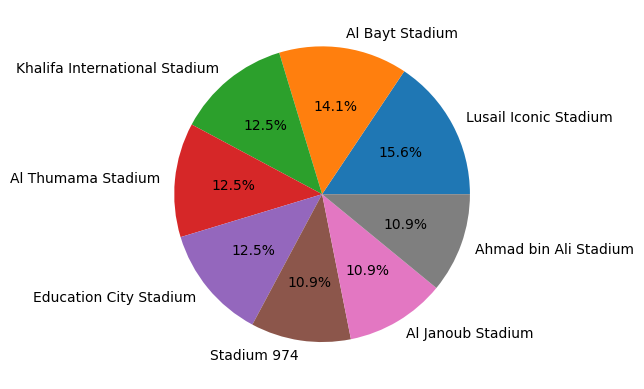

In [ ]:
svd = df_matches["location"].value_counts()
plt.pie(svd, labels= svd.index, autopct='%1.1f%%')
plt.show()

## Lấy ra tên của các đội tham dự giải đấu

In [ ]:
print("Tên các đội:", df_matches["team_name_home"].unique())

Tên các đội: ['Argentina' 'Croatia' 'France' 'England' 'Morocco' 'Netherlands'
 'Portugal' 'Brazil' 'Japan' 'Cameroon' 'Serbia' 'South Korea' 'Ghana'
 'Costa Rica' 'Canada' 'Poland' 'Saudi Arabia' 'Tunisia' 'Australia'
 'Wales' 'Iran' 'Ecuador' 'Spain' 'Belgium' 'Qatar' 'Uruguay'
 'Switzerland' 'Germany' 'Mexico' 'Denmark' 'USA' 'Senegal']


## Lấy ra số bàn thắng được ghi bởi các đội

In [ ]:
goal_home = df_matches.groupby(by = 'team_name_home')['team_home_score'].sum()
goal_away = df_matches.groupby(by = 'team_name_away')['team_away_score'].sum()
df = pd.DataFrame()
df["Team name"] = goal_home.index
df["Total goals"] = goal_away.values + goal_home.values
print(df[["Team name", "Total goals"]])

       Team name  Total goals
0      Argentina           15
1      Australia            4
2        Belgium            1
3         Brazil            8
4       Cameroon            4
5         Canada            2
6     Costa Rica            3
7        Croatia            8
8        Denmark            1
9        Ecuador            4
10       England           13
11        France           16
12       Germany            6
13         Ghana            5
14          Iran            4
15         Japan            5
16        Mexico            2
17       Morocco            6
18   Netherlands           10
19        Poland            3
20      Portugal           12
21         Qatar            1
22  Saudi Arabia            3
23       Senegal            5
24        Serbia            5
25   South Korea            5
26         Spain            9
27   Switzerland            5
28       Tunisia            1
29           USA            3
30       Uruguay            2
31         Wales            1


## Vẽ biểu đồ thể hiện số bàn thắng được ghi bởi mỗi đội (tự chọn kiểu biểu đồ phù hợp)

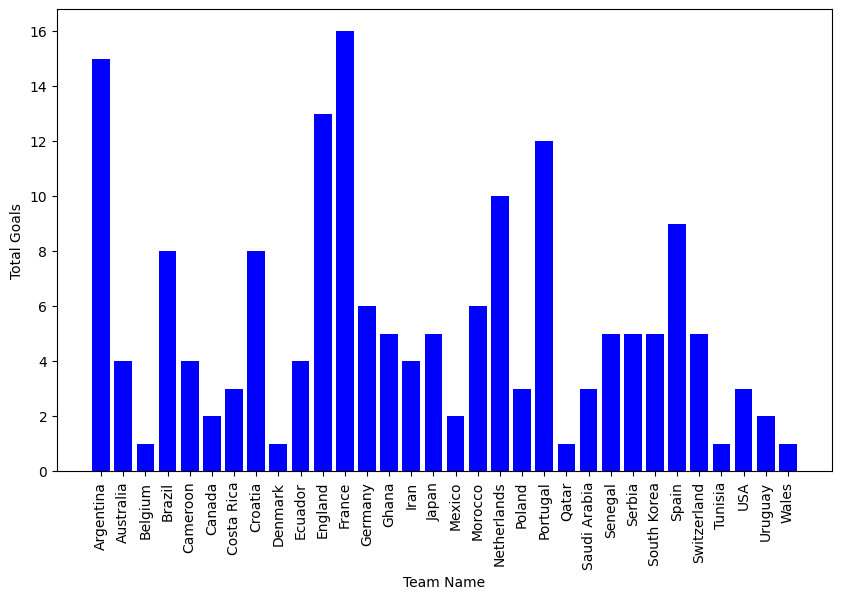

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df["Team name"], df["Total goals"], color='blue')
plt.xlabel('Team Name')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

##Thống kê số lượng bàn thắng được ghi bởi các cầu thủ Argentina bằng biểu đồ tròn

- Yêu cầu phải có tiêu đề cho biểu đồ, chú thích
- Có tỷ lệ phần trăm cho từng cầu thủ
- Tách phần của Alexis Mac Allister ra khỏi biểu đồ

In [ ]:
...

## Thống kê tỷ lệ ra sân của các cầu thủ Pháp bằng biểu đồ

In [ ]:
...

## Thống kê danh sách top 10 vua phá lưới của giải đấu
- Nếu trường hợp hai cầu thủ có cùng số bàn thắng thì chọn cầu thủ có số lượng kiến tạo nhiều hơn
- Sử dụng biểu đồ thích hợp để hiển thị số bàn thắng của top 10

In [ ]:
...

# OpenCV

## Tìm bounding box cho các chữ số trong bức ảnh sau: [ảnh](https://1.bp.blogspot.com/-fGR7t6RnXZs/Uv5kdmT89_I/AAAAAAAAAjg/zZHfaCqnkak/s1600/freeDrawExport_012314055352.png)

- Gợi ý các hàm sử dụng:
  - cv2.threshold
  - cv2.findContours
  - cv2.contourArea
  - cv2.boundingRect

Và các hàm trong thư viện OpenCV đã học hôm trước

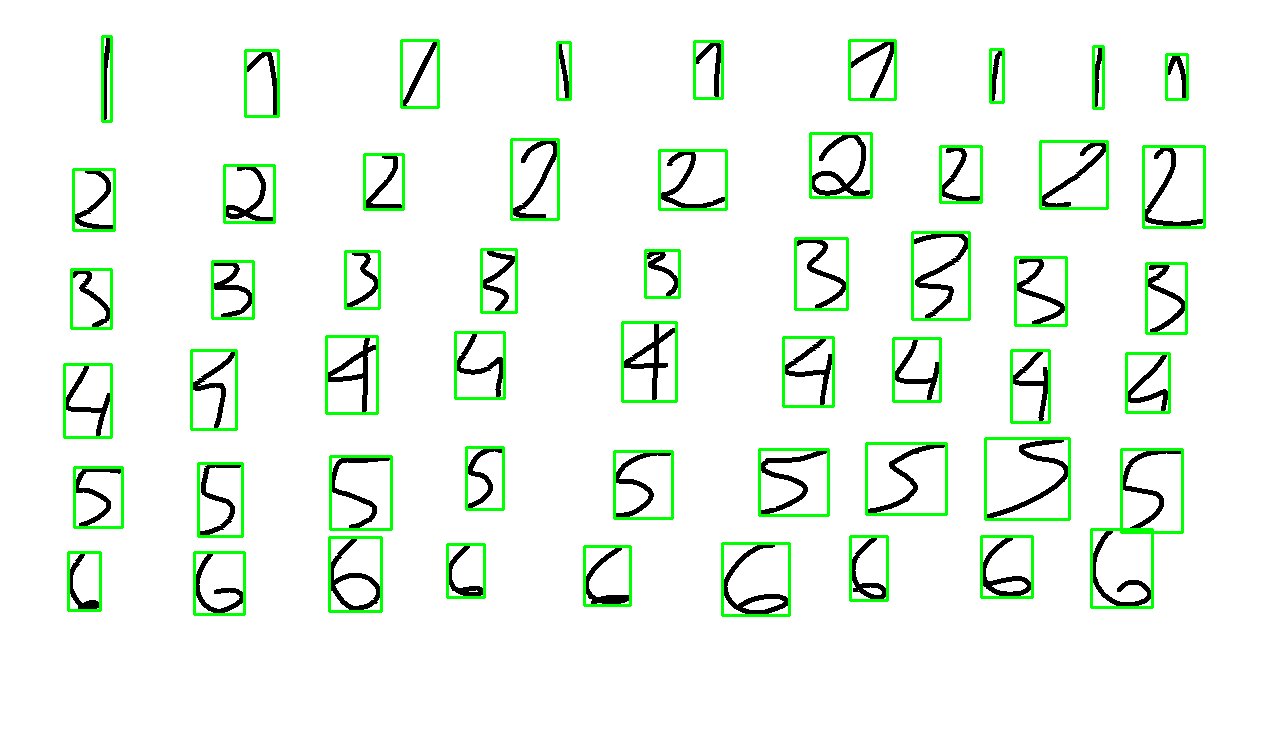

In [50]:
img = cv2.imread(r'/content/freeDrawExport_012314055352.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Áp dụng threshold để chuyển đổi thành ảnh nhị phân
_, binary_img = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Tìm contours trong ảnh nhị phân
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ bounding box cho các contours
for contour in contours:
    # Bỏ qua các contour nhỏ
    if cv2.contourArea(contour) < 100:
        continue
    # Tìm bounding box của contour
    x, y, w, h = cv2.boundingRect(contour)
    # Vẽ bounding box lên ảnh gốc
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Hiển thị ảnh với contours
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thực hiện vẽ logo của CLB Tin Học HIT bằng OpenCV: [Vẽ logo](https://docs.google.com/document/d/1Wfg10lmyVPzGpCa6BWcMd3fpjYD3OGohoyjzy_JfcWc/edit?usp=sharing)

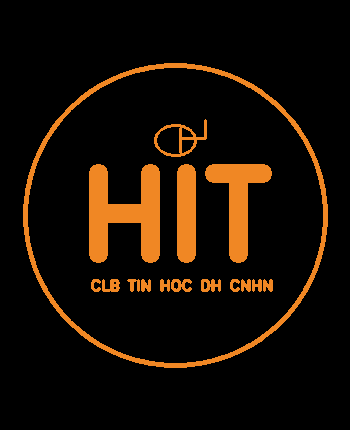

In [61]:
# Tạo hình ảnh đen
result_img = np.zeros((430, 350, 3), dtype=np.uint8)
# Vẽ hình tròn
cv2.circle(result_img, (175, 215), 150, (36, 135, 240), 3)
# Thêm văn bản "HIT"
cv2.putText(result_img, 'HIT', (80, 255), cv2.FONT_HERSHEY_DUPLEX, 4, (36, 135, 240), 13)
# Thêm văn bản "CLB TIN HOC DH CNHN"
cv2.putText(result_img, 'CLB TIN HOC DH CNHN', (90, 290), cv2.FONT_HERSHEY_DUPLEX, 0.5, (36, 135, 240), 2)
# Tạo hình ảnh "Mouse"
mouse_img = np.zeros((430, 350, 3), dtype=np.uint8)
cv2.ellipse(mouse_img, (175, 140), (20, 15), 0, 0, 360, (36, 135, 240), 2)
cv2.line(mouse_img, (180, 152), (180, 128), (36, 135, 240), 2)
cv2.line(mouse_img, (180, 138), (205, 138), (36, 135, 240), 2)
cv2.line(mouse_img, (205, 120), (205, 138), (36, 135, 240), 2)
# Thêm "Mouse" vào hình ảnh gốc
result_img[0:430, 0:350, :] = np.maximum(result_img[0:430, 0:350, :], mouse_img)
# Hiển thị hình ảnh kết quả
cv2_imshow(result_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thực hiện các yêu cầu sau đối với ảnh logo mà bạn vừa vẽ:
- Làm mịn ảnh
- Làm mờ ảnh

Sử dụng các hàm gợi ý sau:
- cv2.filter2D
- cv2.blur
- cv2.GaussianBlur
- cv2.medianBlur
- cv2.bilateralFilter

In [ ]:
...